In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Download the Dataset

In [2]:
import pathlib
# https://www.tensorflow.org/tutorials/images/classification
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [4]:
image_daisy_count = len(list(data_dir.glob('daisy/*.jpg')))
image_dandelion_count = len(list(data_dir.glob('dandelion/*.jpg')))
image_roses_count = len(list(data_dir.glob('roses/*.jpg')))
image_sunflowers_count = len(list(data_dir.glob('sunflowers/*.jpg')))
image_tulips_count = len(list(data_dir.glob('tulips/*.jpg')))

print('image_daisy_count: ', image_daisy_count)
print('image_dandelion_count: ', image_dandelion_count)
print('image_roses_count: ', image_roses_count)
print('image_sunflowers_count: ', image_sunflowers_count)
print('image_tulips_count: ', image_tulips_count)

image_daisy_count:  633
image_dandelion_count:  898
image_roses_count:  641
image_sunflowers_count:  699
image_tulips_count:  799


In [5]:
# Load the dataset (train and validation)
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,  img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
# Load the data set
#batch_size = 32
#img_height = 224
#img_width = 224

#full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#  data_dir,
#  validation_split=None,
  #subset="training",
#  seed=123,
#  image_size=(img_height, img_width),
#  batch_size=batch_size)

In [7]:
#full_dataset.class_names

In [8]:
#DATASET_SIZE = 3670
#train_size = int(0.7 * DATASET_SIZE)
#val_size = int(0.10 * DATASET_SIZE)
#test_size = int(0.20 * DATASET_SIZE)

#full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)
#full_dataset = full_dataset.shuffle(buffer_size=1024)
#train_dataset = full_dataset.take(train_size)
#test_dataset = full_dataset.skip(train_size)
#val_dataset = test_dataset.skip(test_size)
#test_dataset = test_dataset.take(test_size)

In [9]:
# Determine how many batches of data are available in the validation set
# full_ds_batches = tf.data.experimental.cardinality(full_dataset)

# Split the validation set into two datasets: one for validation and one for testing
# test_ds = train_ds.take((2 * full_ds_batches) // 3)
# train_ds = train_ds.skip((2 * full_ds_batches) // 3)

In [10]:
#train_size = int(0.7 * full_ds_batches)
#test_size  = int(0.3 * full_ds_batches)

#train_dataset = data.skip(train_size)
#test_dataset  = data.take(train_size)
#print((2 * full_ds_batches) // 3)
#print((2 * full_ds_batches) // 3)

# Option 1

In [11]:
# Load the dataset
train_ds1, val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds1 = val_ds1.take(22)
val_ds1 = val_ds1.skip(9)

print('Batches for training -->', train_ds1.cardinality())
print('Batches for testing -->', test_ds1.cardinality())
print('Batches for validating -->', val_ds1.cardinality())

# Split the dataset into training and validation sets
#train_ds1 = dataset1.take(round(len(dataset1) * 0.6))
#val_ds1 = dataset1.skip(round(len(dataset1) * 0.4))

# Split the validation set into validation and test sets
#val_ds1 = val_ds1.take(round(len(val_ds1) * 0.2))
#test_ds1 = val_ds1.skip(round(len(val_ds1) * 0.8))

#print('Batches for testing -->', test_ds1.cardinality())
#print('Batches for validating -->', val_ds1.cardinality())

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.
Batches for training --> tf.Tensor(92, shape=(), dtype=int64)
Batches for testing --> tf.Tensor(22, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(14, shape=(), dtype=int64)


## Option 2

In [50]:
# https://stackoverflow.com/questions/71129505/is-it-possible-to-split-a-tensorflow-dataset-into-train-validation-and-test-dat
batch_size = 32

train_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds2 = val_ds2.take(22)
val_ds2 = val_ds2.skip(9)

print('Batches for training -->', train_ds2.cardinality())
print('Batches for testing -->', test_ds2.cardinality())
print('Batches for validating -->', val_ds2.cardinality())

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Batches for training --> tf.Tensor(92, shape=(), dtype=int64)
Batches for testing --> tf.Tensor(22, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(14, shape=(), dtype=int64)


In [16]:
#from tensorflow.keras.utils import split_dataset

#train_ds = split_dataset(train_ds, left_size=)

# https://androidkt.com/set-class-weight-for-imbalance-dataset-in-keras/
# from sklearn.utils import class_weight

# Calculate class weights
#class_weights = class_weight.compute_class_weight(
#    'balanced',
##    np.unique(full_ds.class_names),
#    full_ds.class_names
#)

# Convert class weights to a dictionary
#class_weights_dict = dict(enumerate(class_weights))

# Train your model using the class weights

In [17]:
#AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [18]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Option 3

In [19]:
# Load the dataset
dataset3 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #validation_split=0.2,
  #subset="training",
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = dataset3.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [20]:
# I get my referene here: https://stackoverflow.com/questions/48213766/split-a-dataset-created-by-tensorflow-dataset-api-in-to-train-and-test
import tensorflow as tf

def train_test_split_dataset(dataset, dataset_size, batch_size, train_ratio, test_ratio):
    # 80% training and 20% test. cut a separate validation split (10-20% of total training set size)
    train_ds_size = int((train_ratio * dataset_size) / batch_size)  # 80% training
    test_ds_size = int((test_ratio * dataset_size) / batch_size)    # 20% test
    val_ds_size = int(train_ds_size * .10)                          # 10-20% of "training set size"
    print('Total dataset size: ',dataset_size)
    print('Total dataset by batch: ', int(dataset_size / batch_size))
    print('Train batch size: ', train_ds_size)
    print('Val batch size: ', val_ds_size)
    print('Test batch size: ', test_ds_size)

    train_dataset = dataset.take(train_ds_size)
    remaining = dataset.skip(train_ds_size)
    test_dataset = remaining.take(test_ds_size)

    train_ds_size2 = train_ds_size - val_ds_size
    remaining = train_dataset.skip(train_ds_size2)
    val_dataset = remaining.take(val_ds_size)

    return train_dataset, val_dataset, test_dataset


train_ds3, val_ds3, test_ds3 = train_test_split_dataset(dataset3, 3670, batch_size, 0.8, 0.20)


print('Batches for training -->', train_ds3.cardinality())
print('Batches for validation -->', val_ds3.cardinality())
print('Batches for testing -->', test_ds3.cardinality())

Total dataset size:  3670
Total dataset by batch:  114
Train batch size:  91
Val batch size:  9
Test batch size:  22
Batches for training --> tf.Tensor(91, shape=(), dtype=int64)
Batches for validation --> tf.Tensor(9, shape=(), dtype=int64)
Batches for testing --> tf.Tensor(22, shape=(), dtype=int64)


In [21]:
import matplotlib.pyplot as plt

def viz_data(dataset):
  plt.figure(figsize=(10, 10))
  for images, labels in dataset.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

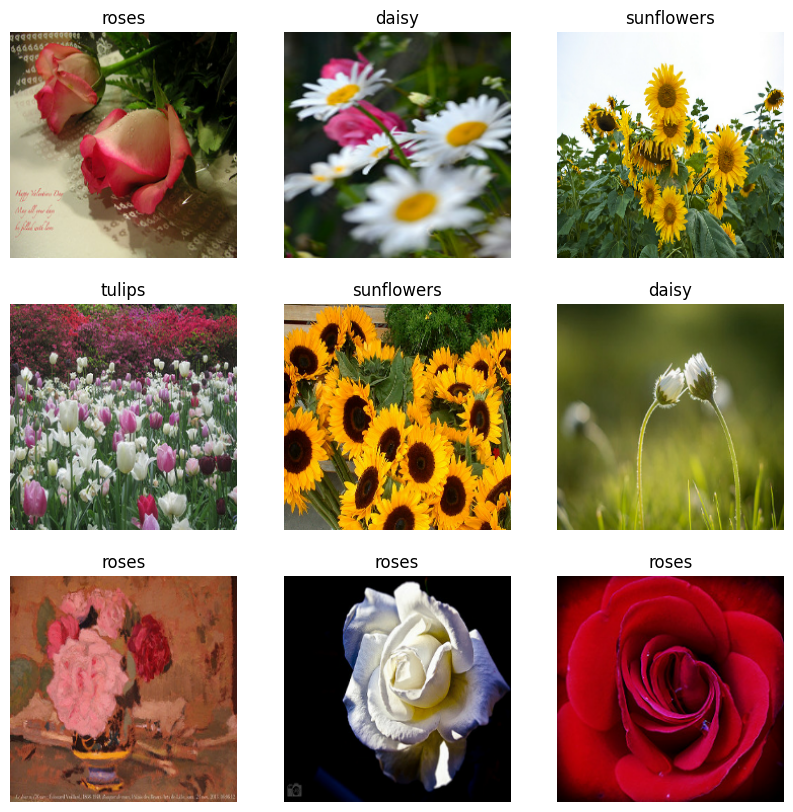

In [22]:
viz_data(test_ds1)

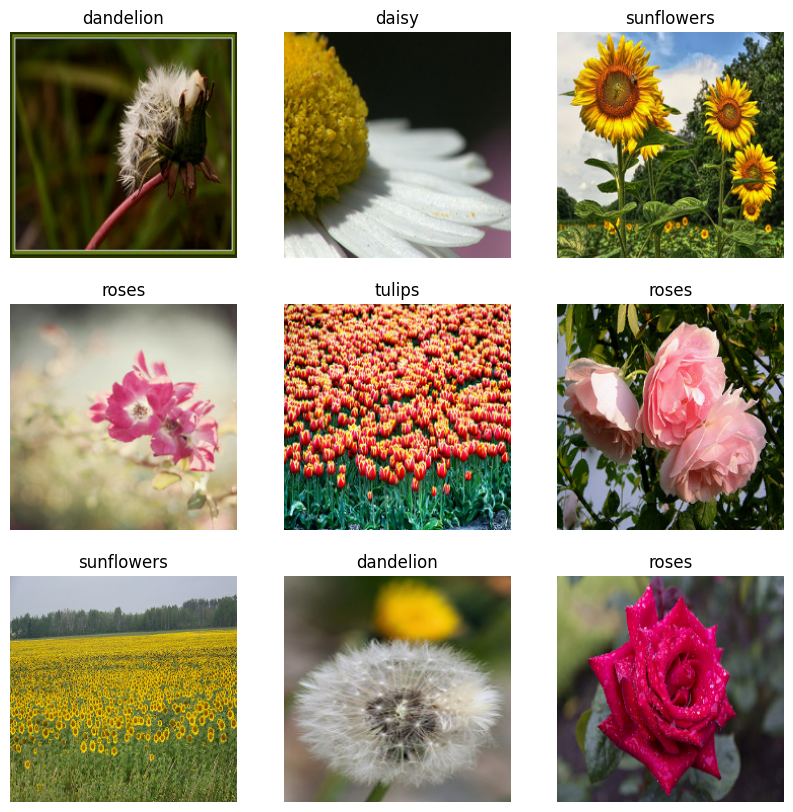

In [23]:
viz_data(test_ds2)

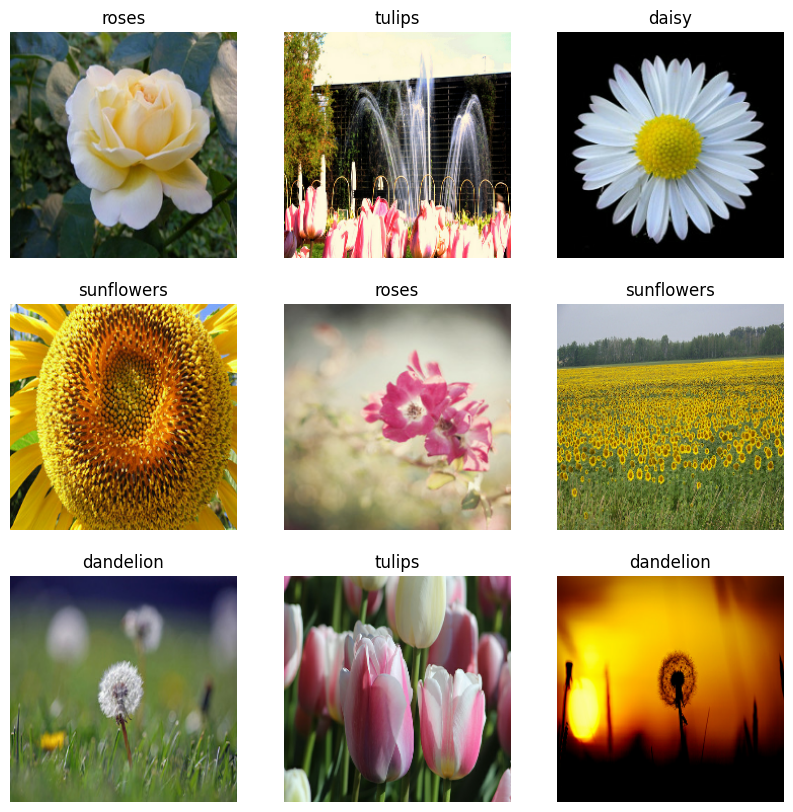

In [24]:
viz_data(test_ds3)

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

#train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#test_ds1 = test_ds1.cache().prefetch(buffer_size=AUTOTUNE)

#train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#test_ds2 = test_ds2.cache().prefetch(buffer_size=AUTOTUNE)

train_ds3 = train_ds3.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds3 = test_ds3.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
normalization_layer = layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds3.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0035705569 1.0


## Train sample model

In [44]:
def plot_graph(accuracy_measures, title):

    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment],
                 label=experiment,
                    linewidth=3)

    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [52]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
# Calculate class weights
class_weights = {
    0: 1.0,  # Class 0
    1: 2.0,  # Class 1
    2: 3.0,  # Class 2
    3: 4.0,  # Class 3
    4: 5.0,  # Class 4
}

#Initialize the measures
accuracy_measures = {}

In [55]:
epochs=10
history1 = model.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs,
  class_weight=class_weights
)

Epoch 1/10
92/92 [==============================] - 8s 65ms/step - loss: 10.1497 - accuracy: 0.3971 - val_loss: 1.3242 - val_accuracy: 0.4430
Epoch 2/10
92/92 [==============================] - 7s 69ms/step - loss: 2.6325 - accuracy: 0.5732 - val_loss: 1.1915 - val_accuracy: 0.5443
Epoch 3/10
92/92 [==============================] - 7s 76ms/step - loss: 1.9696 - accuracy: 0.6870 - val_loss: 1.1509 - val_accuracy: 0.5127
Epoch 4/10
92/92 [==============================] - 7s 68ms/step - loss: 1.4442 - accuracy: 0.7660 - val_loss: 1.0948 - val_accuracy: 0.5759
Epoch 5/10
92/92 [==============================] - 7s 68ms/step - loss: 0.9798 - accuracy: 0.8532 - val_loss: 1.0893 - val_accuracy: 0.6266
Epoch 6/10
92/92 [==============================] - 7s 76ms/step - loss: 0.5821 - accuracy: 0.9166 - val_loss: 1.1666 - val_accuracy: 0.6076
Epoch 7/10
92/92 [==============================] - 7s 76ms/step - loss: 0.3459 - accuracy: 0.9550 - val_loss: 1.1361 - val_accuracy: 0.6456
Epoch 8/10
9

In [56]:
history2 = model.fit(
  train_ds2,
  validation_data=val_ds2,
  epochs=epochs,
  class_weight=class_weights
)

Epoch 1/10
92/92 [==============================] - 6s 66ms/step - loss: 0.0462 - accuracy: 0.9980 - val_loss: 1.4763 - val_accuracy: 0.6188
Epoch 2/10
92/92 [==============================] - 7s 77ms/step - loss: 0.3992 - accuracy: 0.9605 - val_loss: 1.5160 - val_accuracy: 0.5314
Epoch 3/10
92/92 [==============================] - 8s 79ms/step - loss: 0.2342 - accuracy: 0.9734 - val_loss: 1.6323 - val_accuracy: 0.5717
Epoch 4/10
92/92 [==============================] - 6s 65ms/step - loss: 0.0395 - accuracy: 0.9973 - val_loss: 1.7220 - val_accuracy: 0.5807
Epoch 5/10
92/92 [==============================] - 6s 66ms/step - loss: 0.0266 - accuracy: 0.9993 - val_loss: 1.6149 - val_accuracy: 0.6211
Epoch 6/10
92/92 [==============================] - 7s 77ms/step - loss: 0.0141 - accuracy: 0.9997 - val_loss: 1.8290 - val_accuracy: 0.5807
Epoch 7/10
92/92 [==============================] - 7s 75ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.7528 - val_accuracy: 0.5897
Epoch 8/10
92

In [57]:
history3 = model.fit(
  train_ds3,
  validation_data=val_ds3,
  epochs=epochs,
  class_weight=class_weights
)

Epoch 1/10
91/91 [==============================] - 6s 67ms/step - loss: 0.4456 - accuracy: 0.9605 - val_loss: 0.3208 - val_accuracy: 0.8993
Epoch 2/10
91/91 [==============================] - 7s 79ms/step - loss: 0.3718 - accuracy: 0.9619 - val_loss: 0.2651 - val_accuracy: 0.9340
Epoch 3/10
91/91 [==============================] - 6s 67ms/step - loss: 0.1076 - accuracy: 0.9900 - val_loss: 0.2990 - val_accuracy: 0.9201
Epoch 4/10
91/91 [==============================] - 7s 79ms/step - loss: 0.0236 - accuracy: 0.9997 - val_loss: 0.3499 - val_accuracy: 0.9236
Epoch 5/10
91/91 [==============================] - 6s 66ms/step - loss: 0.0734 - accuracy: 0.9935 - val_loss: 0.4033 - val_accuracy: 0.9340
Epoch 6/10
91/91 [==============================] - 6s 67ms/step - loss: 0.0232 - accuracy: 0.9986 - val_loss: 0.3616 - val_accuracy: 0.9271
Epoch 7/10
91/91 [==============================] - 6s 68ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2212 - val_accuracy: 0.9444
Epoch 8/10
91

In [58]:
accuracy_measures['model_1'] = history1.history["accuracy"]
accuracy_measures['model_2'] = history2.history["accuracy"]
accuracy_measures['model_3'] = history3.history["accuracy"]

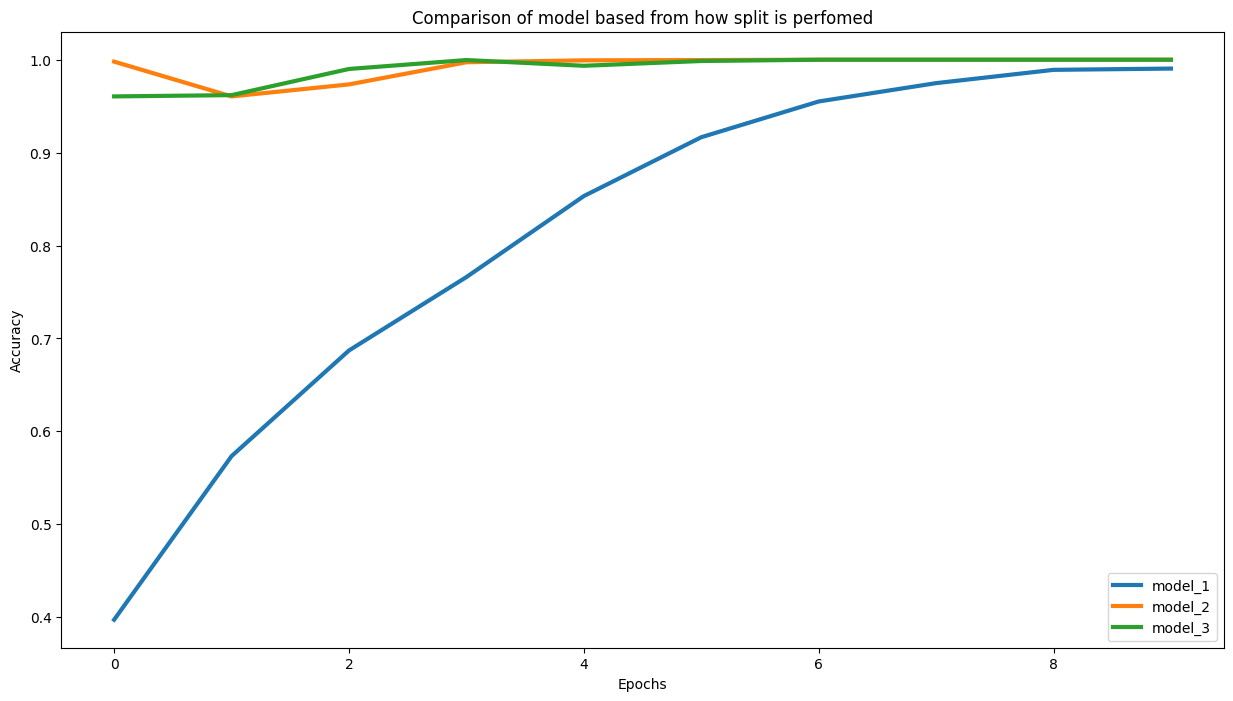

In [59]:
plot_graph(accuracy_measures, "Comparison of model based from how split is perfomed")